In [1]:
from dask.distributed import Client
import dask
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 3
Total threads: 6,Total memory: 94.21 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38657,Workers: 3
Dashboard: http://127.0.0.1:8787/status,Total threads: 6
Started: Just now,Total memory: 94.21 GiB
Comm: tcp://127.0.0.1:41475,Total threads: 2
Dashboard: http://127.0.0.1:35723/status,Memory: 31.40 GiB
Nanny: tcp://127.0.0.1:42561,


2024-08-09 10:05:41,709 - distributed.scheduler - WARNING - Removing worker 'tcp://127.0.0.1:33995' caused the cluster to lose already computed task(s), which will be recomputed elsewhere: {'add-77fe86c5-1734-4a74-a9e9-9b0a939cb821', 'add-3fab8978-7a14-42ce-9340-70b556421b71', 'add-91d3cee3-1d16-431e-807d-8e9898d366ff', 'add-e44f8b0a-2078-48d8-82ef-d61b6e7b688c', 'add-b02c952b-eebe-4278-9b99-3086c315f382', 'add-3507e236-e260-41c1-a1a2-cf2b86d406c4', 'add-799db7c7-1062-4fef-88b3-d6da96347a46', 'add-2d064832-55d6-4728-b76e-f49883320084', 'add-93ee0e98-6b5f-46c3-8410-736f2b29a0b7', 'add-89a670df-88b4-416c-8118-e571ef2d918c', 'add-cadff22c-81fd-4549-925e-c963e260af9c', 'add-1e2d242c-602c-4860-aa62-18da6bd06e1a', 'add-c5e81c91-37a1-42d0-8f91-45e4e271413d', 'add-e70c78ae-db90-4134-9111-5804562b9fc4', 'add-c6611204-697e-4ca8-9aca-4361f0ca2674', 'add-db4bdf1e-c153-48db-8bd1-54f8ff6739d9', 'add-1acc9280-d208-4df1-8032-5d0bc73e304d', 'add-e704e253-e14d-4daa-a7e4-182db053fb0f', 'add-f6f31d2a-fe45

In [23]:
import time
import random
import dask

@dask.delayed
def inc(x):
    time.sleep(random.random())
    return x + 1

@dask.delayed
def dec(x):
    time.sleep(random.random())
    return x - 1

@dask.delayed
def add(x, y):
    time.sleep(random.random())
    return x + y

In [27]:

x = inc(1)
y = dec(2)
z = add(x, y)
z

Delayed('add-c6ea94b0-5703-45c4-b816-0eab76cda15f')

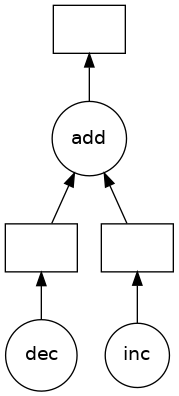

In [28]:
z.visualize()

In [51]:
z.compute()

255

In [61]:
zs = []
for i in range(128):
    x = inc(i)
    y = dec(x)
    z = add(x, y)
    zs.append(z)

zs = dask.persist(*zs)

In [62]:
L = zs

while len(L) > 1:
    new_L = []
    for i in range(0, len(L), 2):
        lazy = add(L[i], L[i+1])
        new_L.append(lazy)
    L = new_L

dask.compute(L)

([16384],)

In [55]:
from dask.graph_manipulation import bind

In [56]:
DATA = []

In [57]:
@dask.delayed
def inc(x):
    return x + 1

@dask.delayed
def add_data(x):
    DATA.append(x)

@dask.delayed
def sum_data(x):
    return sum(DATA) + x

In [58]:
a = inc(1)
b = add_data(a)
c = inc(3)
d = add_data(c)
e = inc(5)
f = bind(sum_data, [b, d])(e)


In [60]:
f.compute()

6